<h1 style = "color : green"> External Diversion</h1>

<b> This Notebook is used to Visualize the User Browsing Behavior </b>

<b style = "color : red" > 1. Including all the import statements </b>

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<b style = "color : red" > 2. Read the Data from the CSV file with pandas </b>

In [3]:
data = pd.read_csv('s1.csv')

#To Reverse The Dataframe rows 
data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]
data = data.sort_index(ascending=True, axis=0)
data = data.reindex(index=data.index[::-1])


In [4]:
data

,<ROOT>_id,"[]""_id""",id,lastVisitTimeLocal,lastVisitTimeUTC,title,typedCount,url,visitCount
44,2000001,3000045,50,"1/17/2018, 9:22:08 PM",1/17/2018 3:52:08 PM,NaN,0,https://www.geeksforgeeks.org/array-data-struc...,1
43,2000001,3000044,51,"1/17/2018, 9:22:21 PM",1/17/2018 3:52:21 PM,Program for array rotation - GeeksforGeeks,0,https://www.geeksforgeeks.org/array-rotation/,1
42,2000001,3000043,54,"1/17/2018, 9:27:19 PM",1/17/2018 3:57:19 PM,The Verge,0,https://www.theverge.com/,1
41,2000001,3000042,55,"1/17/2018, 9:27:42 PM",1/17/2018 3:57:42 PM,Ride-sharing - The Verge,0,https://www.theverge.com/ride-sharing,2
40,2000001,3000041,56,"1/17/2018, 9:28:04 PM",1/17/2018 3:58:04 PM,NaN,0,https://www.facebook.com/photo.php?fbid=924044...,1
39,2000001,3000040,45,"1/17/2018, 9:28:32 PM",1/17/2018 3:58:32 PM,(1) Facebook,0,https://www.facebook.com/,4
38,2000001,3000039,57,"1/17/2018, 9:29:07 PM",1/17/2018 3:59:07 PM,tech crunch - Google Search,0,https://www.google.co.in/search?q=tech+crunch&...,1
37,2000001,3000038,58,"1/17/2018, 9:29:11 PM",1/17/2018 3:59:11 PM,zomoto - Google Search,0,https://www.google.co.in/search?q=zomoto&oq=zo...,1
36,2000001,3000037,59,"1/17/2018, 9:29:14 PM",1/17/2018 3:59:14 PM,Best Restaurants in India - Zomato,0,https://www.zomato.com/india,1
35,2000001,3000036,60,"1/17/2018, 9:29:35 PM",1/17/2018 3:59:35 PM,Zomato,0,https://www.zomato.com/ncr,1


In [5]:
data['indx'] = 0
temp = len(data)

for i in range(0,len(data)):
    data['indx'][i] = temp
    temp -=1


/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<h2 style = "color:red"> FOR FIREFOX </h2>

In [2]:
from datetime import datetime as dt
import pandas as pd

file = "u2.csv"
data = pd.read_csv(file,error_bad_lines=False)

date = ''
time = ''
date_obj = None
new = []
for i in data[data.columns[1]]:
    date_obj = dt.strptime(i, '%Y-%m-%d %H:%M:%S')
    new.append(dt.strftime(date_obj, '%m/%d/%Y %I:%M:%S %p'))

data[data.columns[1]] = new


In [32]:
data

,<ROOT>_id,"[]""_id""",id,lastVisitTimeLocal,lastVisitTimeUTC,title,typedCount,url,visitCount,indx
44,2000001,3000045,50,"1/17/2018, 9:22:08 PM",1/17/2018 3:52:08 PM,NaN,0,https://www.geeksforgeeks.org/array-data-struc...,1,1
43,2000001,3000044,51,"1/17/2018, 9:22:21 PM",1/17/2018 3:52:21 PM,Program for array rotation - GeeksforGeeks,0,https://www.geeksforgeeks.org/array-rotation/,1,2
42,2000001,3000043,54,"1/17/2018, 9:27:19 PM",1/17/2018 3:57:19 PM,The Verge,0,https://www.theverge.com/,1,3
41,2000001,3000042,55,"1/17/2018, 9:27:42 PM",1/17/2018 3:57:42 PM,Ride-sharing - The Verge,0,https://www.theverge.com/ride-sharing,2,4
40,2000001,3000041,56,"1/17/2018, 9:28:04 PM",1/17/2018 3:58:04 PM,NaN,0,https://www.facebook.com/photo.php?fbid=924044...,1,5
39,2000001,3000040,45,"1/17/2018, 9:28:32 PM",1/17/2018 3:58:32 PM,(1) Facebook,0,https://www.facebook.com/,4,6
38,2000001,3000039,57,"1/17/2018, 9:29:07 PM",1/17/2018 3:59:07 PM,tech crunch - Google Search,0,https://www.google.co.in/search?q=tech+crunch&...,1,7
37,2000001,3000038,58,"1/17/2018, 9:29:11 PM",1/17/2018 3:59:11 PM,zomoto - Google Search,0,https://www.google.co.in/search?q=zomoto&oq=zo...,1,8
36,2000001,3000037,59,"1/17/2018, 9:29:14 PM",1/17/2018 3:59:14 PM,Best Restaurants in India - Zomato,0,https://www.zomato.com/india,1,9
35,2000001,3000036,60,"1/17/2018, 9:29:35 PM",1/17/2018 3:59:35 PM,Zomato,0,https://www.zomato.com/ncr,1,10


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [6]:
#data = data.drop(["[]_id",'<ROOT>_id','typedCount'],axis=1)
#data = data.dropna()
#data.drop(48)
data

,<ROOT>_id,"[]""_id""",id,lastVisitTimeLocal,lastVisitTimeUTC,title,typedCount,url,visitCount,indx
44,2000001,3000045,50,"1/17/2018, 9:22:08 PM",1/17/2018 3:52:08 PM,NaN,0,https://www.geeksforgeeks.org/array-data-struc...,1,1
43,2000001,3000044,51,"1/17/2018, 9:22:21 PM",1/17/2018 3:52:21 PM,Program for array rotation - GeeksforGeeks,0,https://www.geeksforgeeks.org/array-rotation/,1,2
42,2000001,3000043,54,"1/17/2018, 9:27:19 PM",1/17/2018 3:57:19 PM,The Verge,0,https://www.theverge.com/,1,3
41,2000001,3000042,55,"1/17/2018, 9:27:42 PM",1/17/2018 3:57:42 PM,Ride-sharing - The Verge,0,https://www.theverge.com/ride-sharing,2,4
40,2000001,3000041,56,"1/17/2018, 9:28:04 PM",1/17/2018 3:58:04 PM,NaN,0,https://www.facebook.com/photo.php?fbid=924044...,1,5
39,2000001,3000040,45,"1/17/2018, 9:28:32 PM",1/17/2018 3:58:32 PM,(1) Facebook,0,https://www.facebook.com/,4,6
38,2000001,3000039,57,"1/17/2018, 9:29:07 PM",1/17/2018 3:59:07 PM,tech crunch - Google Search,0,https://www.google.co.in/search?q=tech+crunch&...,1,7
37,2000001,3000038,58,"1/17/2018, 9:29:11 PM",1/17/2018 3:59:11 PM,zomoto - Google Search,0,https://www.google.co.in/search?q=zomoto&oq=zo...,1,8
36,2000001,3000037,59,"1/17/2018, 9:29:14 PM",1/17/2018 3:59:14 PM,Best Restaurants in India - Zomato,0,https://www.zomato.com/india,1,9
35,2000001,3000036,60,"1/17/2018, 9:29:35 PM",1/17/2018 3:59:35 PM,Zomato,0,https://www.zomato.com/ncr,1,10


<b style = "color : red" >4. categorizing the URL</b>

In [7]:
TAG_RE = re.compile(r"<[^>]+>")
def remove_tags(text):
    return TAG_RE.sub('', text)

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res


def datum_categ(text):

    datum_box = DatumBox("4e9f0a6e14a83e38d9d9fac895c84e68")
    return datum_box.topic_classification(text)

def text_extract(url):
    try:
        
        try:
            page3 = urllib2.urlopen(url).read()
        
        except urllib2.HTTPError, err:
        
            if err.code == 404:
                print "Page not found!"
                return 'Error'
        
            elif err.code == 403:
                print "Access denied!"
                return 'Error'
    
            else:
                print "Something happened! Error code", err.code
                return 'Error'
        
        except urllib2.URLError, err:
            print "Some other error happened:", err.reason
            return 'Error'
        
        #page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


def categ(a):
    url = a
    print url,
    return datum_categ(text_extract(url))
    


In [8]:
x = data

test_data = x.loc[:,('indx','title','url','lastVisitTimeLocal','visitCount')] 


def categorize (name):
    print "1"
    if('www.google' in str(name)): 
        return 'Search' 
    elif (('mail' in str(name)) or ('docs' in str(name))):
        return 'Mail'
    if(('nstagram' in str(name)) or ('hotstar' in str(name))): 
        return 'Recreation & Activities'
    if (('zomato' in str(name))):
        return 
    else:
        return categ(name)
    

test_data['category'] = test_data['url'].map(categorize)

test_data

1
https://www.geeksforgeeks.org/array-data-structure/#introduction 1
https://www.geeksforgeeks.org/array-rotation/ 1
https://www.theverge.com/ 1
https://www.theverge.com/ride-sharing 1
https://www.facebook.com/photo.php?fbid=924044441082453&set=a.103989873087918.9637.100004307168244&type=3&theater 1
https://www.facebook.com/ 1
1
1
1
1
1
1
https://www.wired.com/story/twitter-project-veritas-videos-backlash/ 1
1
1
https://www.nationalgeographic.com/ 1
https://www.donaldjtrump.com/ Access denied!
1
https://www.donaldjtrump.com/about/ Access denied!
1
https://news.nationalgeographic.com/2018/01/wildlife-watch-indonesia-wildlife-crime-burn/ 1
https://www.geeksforgeeks.org/data-structures/ 1
https://www.geeksforgeeks.org/data-structures/linked-list/ 1
https://www.geeksforgeeks.org/data-structures/linked-list/#singlyLinkedList 1
https://www.wired.com/story/facebooks-adam-mosseri-on-why-youll-see-less-video-more-from-friends/ 1
https://www.geeksforgeeks.org/linked-list-set-1-introduction/ 1
1


,indx,title,url,lastVisitTimeLocal,visitCount,category
44,1,NaN,https://www.geeksforgeeks.org/array-data-struc...,"1/17/2018, 9:22:08 PM",1,Computers & Technology
43,2,Program for array rotation - GeeksforGeeks,https://www.geeksforgeeks.org/array-rotation/,"1/17/2018, 9:22:21 PM",1,Computers & Technology
42,3,The Verge,https://www.theverge.com/,"1/17/2018, 9:27:19 PM",1,News
41,4,Ride-sharing - The Verge,https://www.theverge.com/ride-sharing,"1/17/2018, 9:27:42 PM",2,Computers & Technology
40,5,NaN,https://www.facebook.com/photo.php?fbid=924044...,"1/17/2018, 9:28:04 PM",1,Science
39,6,(1) Facebook,https://www.facebook.com/,"1/17/2018, 9:28:32 PM",4,Computers & Technology
38,7,tech crunch - Google Search,https://www.google.co.in/search?q=tech+crunch&...,"1/17/2018, 9:29:07 PM",1,Search
37,8,zomoto - Google Search,https://www.google.co.in/search?q=zomoto&oq=zo...,"1/17/2018, 9:29:11 PM",1,Search
36,9,Best Restaurants in India - Zomato,https://www.zomato.com/india,"1/17/2018, 9:29:14 PM",1,None
35,10,Zomato,https://www.zomato.com/ncr,"1/17/2018, 9:29:35 PM",1,None


In [9]:
test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category
44,1,NaN,https://www.geeksforgeeks.org/array-data-struc...,"1/17/2018, 9:22:08 PM",1,Computers & Technology
43,2,Program for array rotation - GeeksforGeeks,https://www.geeksforgeeks.org/array-rotation/,"1/17/2018, 9:22:21 PM",1,Computers & Technology
42,3,The Verge,https://www.theverge.com/,"1/17/2018, 9:27:19 PM",1,News
41,4,Ride-sharing - The Verge,https://www.theverge.com/ride-sharing,"1/17/2018, 9:27:42 PM",2,Computers & Technology
40,5,NaN,https://www.facebook.com/photo.php?fbid=924044...,"1/17/2018, 9:28:04 PM",1,Science
39,6,(1) Facebook,https://www.facebook.com/,"1/17/2018, 9:28:32 PM",4,Computers & Technology
38,7,tech crunch - Google Search,https://www.google.co.in/search?q=tech+crunch&...,"1/17/2018, 9:29:07 PM",1,Search
37,8,zomoto - Google Search,https://www.google.co.in/search?q=zomoto&oq=zo...,"1/17/2018, 9:29:11 PM",1,Search
36,9,Best Restaurants in India - Zomato,https://www.zomato.com/india,"1/17/2018, 9:29:14 PM",1,None
35,10,Zomato,https://www.zomato.com/ncr,"1/17/2018, 9:29:35 PM",1,None


<b style = "color : red" >5. Calculating the amount of time spent on each URL</b>

In [10]:
i_max = test_data.shape[0]

time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    
    i_base = test_data.iloc[i]['lastVisitTimeLocal']
    j_base = test_data.iloc[j]['lastVisitTimeLocal']
    
  
    if (i_base.split('/')[0] == j_base.split('/')[0]):
        if (i_base.split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append (abs(i_time - j_time))
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values


In [23]:
test_data = test_data[1:44]
test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent
43,2,Program for array rotation - GeeksforGeeks,https://www.geeksforgeeks.org/array-rotation/,"1/17/2018, 9:22:21 PM",1,Computers & Technology,13
42,3,The Verge,https://www.theverge.com/,"1/17/2018, 9:27:19 PM",1,News,298
41,4,Ride-sharing - The Verge,https://www.theverge.com/ride-sharing,"1/17/2018, 9:27:42 PM",2,Computers & Technology,23
40,5,NaN,https://www.facebook.com/photo.php?fbid=924044...,"1/17/2018, 9:28:04 PM",1,Science,22
39,6,(1) Facebook,https://www.facebook.com/,"1/17/2018, 9:28:32 PM",4,Computers & Technology,28
38,7,tech crunch - Google Search,https://www.google.co.in/search?q=tech+crunch&...,"1/17/2018, 9:29:07 PM",1,Search,35
37,8,zomoto - Google Search,https://www.google.co.in/search?q=zomoto&oq=zo...,"1/17/2018, 9:29:11 PM",1,Search,4
36,9,Best Restaurants in India - Zomato,https://www.zomato.com/india,"1/17/2018, 9:29:14 PM",1,None,3
35,10,Zomato,https://www.zomato.com/ncr,"1/17/2018, 9:29:35 PM",1,None,21
34,11,twitter - Google Search,https://www.google.co.in/search?q=twitter&oq=t...,"1/17/2018, 9:29:48 PM",1,Search,13


In [24]:
test_data.to_csv('/home/sreeram_0xb5e/Desktop/debug.csv', encoding='utf-8', index=False)

<br>
<br>
<b style = "color : red ;font-size: 20px " >6. Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

<b >6.1 Amount Of Time Spent On Each Category </b>

In [32]:
# Listing the lables
labels = "Arts","Business & Economy","Computers & Technology","Health","Home & Domestic Life","Mail","News","Search","Shopping","Society","Sports","Recreation & Activities","Reference & Education","Science","Error"


# Augumenting the time spent on each label
i_max = test_data.shape[0]


category_dict = {"Arts":0 ,"Business & Economy":0,
                 "Computers & Technology":0,"Error":0,
                 "Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,
                 "Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,
                 "Search":0,"Mail":0}



for i in range(0,i_max):
    
    if (str(test_data.iloc[i]['timeSpent']) is "NA" ):
        category_dict[test_data.iloc[i]['category']] += 0
    else:
        category_dict[test_data.iloc[i]['category']] += int(test_data.iloc[i]['timeSpent'])
    

ordered_category_dict = sorted(category_dict.items())

sizes = []

for i in ordered_category_dict:
    sizes.append(i[1])



print ordered_category_dict
#print sizes

# Now drawing the Pie Diagrm

fig1, ax1 = plt.subplots(figsize=(15,8))
#colors = sns.color_palette("hls",14)

colors = ['aqua','azure','purple','blue','brown','chartreuse','chocolate','coral','crimson','cyan','darkblue',
          'darkgreen','goldenrod','salmon','grey']

ax1.pie(sizes, explode=None ,colors = colors, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=120)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(("Arts","Business & Economy","Computers & Technology","Error","Health","Home & Domestic Life","Mail","News",'Recreation & Activities',
            'Reference & Education','Science','Search','Shopping','Society','Sports'),
           scatterpoints=1,loc='upper right',fontsize=10)

print 'Amount Of Time Spent On Each Category'
plt.show()



KeyError: None

<br>
<br>
<b >6.2 Time Spent on each category in Chronological order</b>
<br>
<br>

In [14]:
# mapping the catagories with specific colors

color_dict = { "Arts":"aqua","Business & Economy":"azure","Computers & Technology":"purple","Error":"blue",
              "Health":"brown", "Home & Domestic Life" : "chartreuse","Mail":"chocolate","News":"coral",
              "Recreation & Activities":"crimson", 'Reference & Education':"cyan",'Science':"purple",
              "Search":"darkgreen",'Shopping':"goldenrod",'Society':"salmon",'Sports':"grey" }


color_list = []
def map_color(color):
        return color_dict[color]

for i in range(0,test_data.shape[0]):
    color_list.append(map_color(test_data.iloc[i]['category']))

td = pd.Series(color_list)
test_data['color'] = td.values

test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent,color
0,NaN,NaN,https://mail.google.com/,12/20/2017 07:20:33 AM,NaN,Mail,NA,chocolate
1,NaN,NaN,https://mail.google.com/mail/,12/20/2017 07:20:33 AM,NaN,Mail,0,chocolate
2,NaN,NaN,https://mail.google.com/mail/u/0/,12/20/2017 07:20:34 AM,NaN,Mail,1,chocolate
3,NaN,NaN,https://mail.google.com/mail/u/0/#inbox,12/20/2017 07:20:40 AM,NaN,Mail,6,chocolate
4,NaN,NaN,https://mail.google.com/mail/u/0/#sent,12/20/2017 07:21:12 AM,NaN,Mail,32,chocolate
5,NaN,NaN,https://mail.google.com/mail/u/0/#sent/1606f09...,12/20/2017 07:21:18 AM,NaN,Mail,6,chocolate
6,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:11 AM,NaN,Mail,293,chocolate
7,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:17 AM,NaN,Mail,6,chocolate
8,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:20 AM,NaN,Mail,3,chocolate
9,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:24 AM,NaN,Mail,4,chocolate


<h2> Saving as an Offline copy</h2>

In [15]:
import pickle 
with open('/home/sreeram_0xb5e/Desktop/ED(3.csv)', 'wb') as f:
    pickle.dump(test_data, f, -1)

In [16]:
import pickle
with open('/home/sreeram_0xb5e/Desktop/ED(3.csv)', 'rb') as f:
    test_data= pickle.load(f)

test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent,color
0,NaN,NaN,https://mail.google.com/,12/20/2017 07:20:33 AM,NaN,Mail,NA,chocolate
1,NaN,NaN,https://mail.google.com/mail/,12/20/2017 07:20:33 AM,NaN,Mail,0,chocolate
2,NaN,NaN,https://mail.google.com/mail/u/0/,12/20/2017 07:20:34 AM,NaN,Mail,1,chocolate
3,NaN,NaN,https://mail.google.com/mail/u/0/#inbox,12/20/2017 07:20:40 AM,NaN,Mail,6,chocolate
4,NaN,NaN,https://mail.google.com/mail/u/0/#sent,12/20/2017 07:21:12 AM,NaN,Mail,32,chocolate
5,NaN,NaN,https://mail.google.com/mail/u/0/#sent/1606f09...,12/20/2017 07:21:18 AM,NaN,Mail,6,chocolate
6,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:11 AM,NaN,Mail,293,chocolate
7,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:17 AM,NaN,Mail,6,chocolate
8,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:20 AM,NaN,Mail,3,chocolate
9,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:24 AM,NaN,Mail,4,chocolate


</br>
<h2>Choosing the Sample Data from Detailed Analysis</h2>
</br>


In [17]:
print test_data.shape[0]

sample_test_data = test_data
print sample_test_data.shape[0]

64
64



</br>
<h2>Time Spent Graph</h2>
</br>


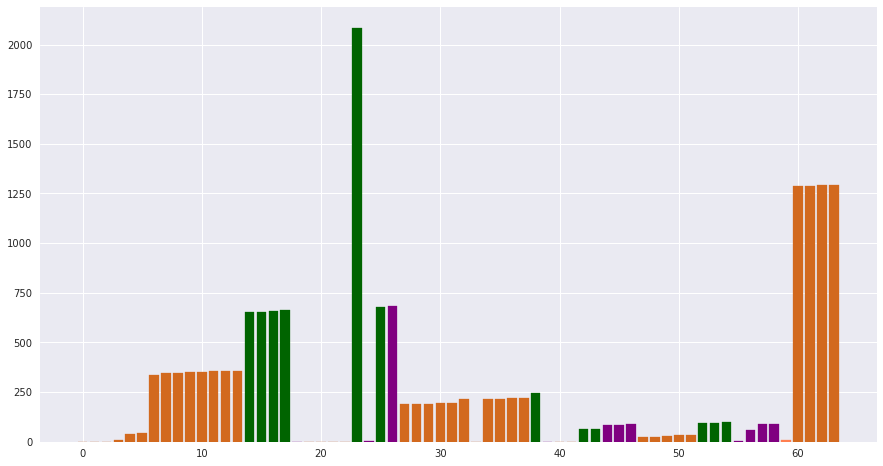

[0, 0, 3, 19, 22, 169, 172, 173, 175, 176, 177, 178, 179, 326, 326, 329, 330, 220, 165, 165, 165, 686, 550, 685, 686, 603, 604, 604, 604, 604, 608, 608, 608, 608, 609, 613, 525, 460, 460, 468, 468, 425, 425, 426, 385, 386, 386, 386, 387, 392, 393, 393, 358, 363, 365, 365, 336, 409, 409, 409, 409]


In [18]:
time_spent_list = []

temp = 0
temp_category = ''


switch_time = []
count = 1
switch_temp = 0

for i in range(0,sample_test_data.shape[0]):
    
    if (sample_test_data.iloc[i]['timeSpent'] == 'NA'):
        time_spent_list.append(0)
    
    else:
        
        switch_temp += sample_test_data.iloc[i]['timeSpent']
        if ((temp_category == sample_test_data.iloc[i]['category']) or (sample_test_data.iloc[i]['category'] == 'Search') 
             or (temp_category == 'Computers & Technology' and sample_test_data.iloc[i]['category'] == 'Science') or
             (temp_category == 'Science' and sample_test_data.iloc[i]['category'] == 'Computers & Technology')):
        
            acc_temp = temp + sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(acc_temp)
            temp = acc_temp
            
        else:
            count += 1
            temp = sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(temp)
            temp_category = sample_test_data.iloc[i]['category']
        
        switch_time.append(switch_temp/count)

        

figure = plt.figure(figsize=(15,8))
pts = np.arange(sample_test_data.shape[0])
p = plt.bar(pts, height= time_spent_list)



for i in range(0,sample_test_data.shape[0]):
    p.patches[i].set_color(color_list[i])
    

plt.show()

print switch_time

<h2> Switch Rate Graph <h2>

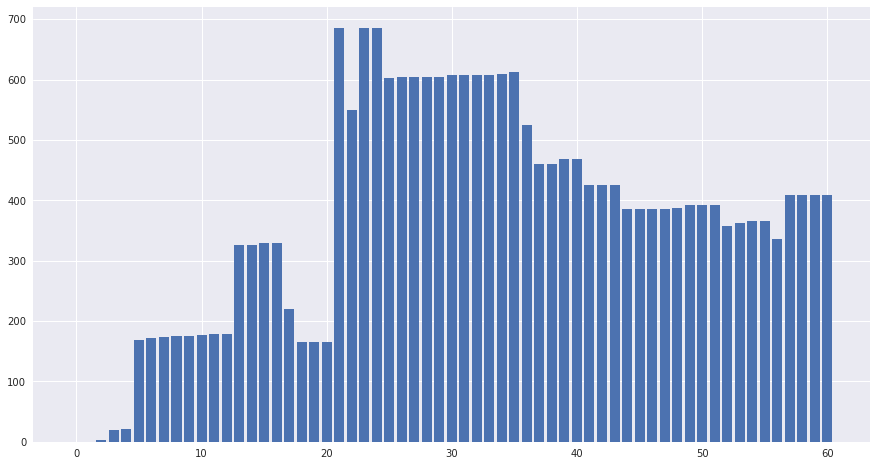

In [19]:
figure = plt.figure(figsize=(15,8))
pts = np.arange(len(switch_time))
p = plt.bar(pts, height= switch_time)
# 
plt.show()

<h2> Removing the Unknown switch rate value </h2>

In [20]:
test_data = test_data[test_data.timeSpent != 'NA']
test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent,color
1,NaN,NaN,https://mail.google.com/mail/,12/20/2017 07:20:33 AM,NaN,Mail,0,chocolate
2,NaN,NaN,https://mail.google.com/mail/u/0/,12/20/2017 07:20:34 AM,NaN,Mail,1,chocolate
3,NaN,NaN,https://mail.google.com/mail/u/0/#inbox,12/20/2017 07:20:40 AM,NaN,Mail,6,chocolate
4,NaN,NaN,https://mail.google.com/mail/u/0/#sent,12/20/2017 07:21:12 AM,NaN,Mail,32,chocolate
5,NaN,NaN,https://mail.google.com/mail/u/0/#sent/1606f09...,12/20/2017 07:21:18 AM,NaN,Mail,6,chocolate
6,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:11 AM,NaN,Mail,293,chocolate
7,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:17 AM,NaN,Mail,6,chocolate
8,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:20 AM,NaN,Mail,3,chocolate
9,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:24 AM,NaN,Mail,4,chocolate
10,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:26 AM,NaN,Mail,2,chocolate


<h2> Calculating Session number and Avg Switching time </h2>

In [21]:
test_data['nos'] = 1
test_data['switchrate'] = 'NA'

aug_time = 1
nos = 1

for i in range (0,len(test_data)-1):
    if (test_data.category.iloc[i] != test_data.category.iloc[i+1]):
        nos +=1
        
    test_data.nos.iloc[i] = nos
    if (test_data.timeSpent.iloc[i] != 'NA'):
        aug_time += test_data.timeSpent.iloc[i]
        test_data.switchrate.iloc[i] = float(nos) / aug_time
        

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [22]:
test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent,color,nos,switchrate
1,NaN,NaN,https://mail.google.com/mail/,12/20/2017 07:20:33 AM,NaN,Mail,0,chocolate,1,1
2,NaN,NaN,https://mail.google.com/mail/u/0/,12/20/2017 07:20:34 AM,NaN,Mail,1,chocolate,1,0.5
3,NaN,NaN,https://mail.google.com/mail/u/0/#inbox,12/20/2017 07:20:40 AM,NaN,Mail,6,chocolate,1,0.125
4,NaN,NaN,https://mail.google.com/mail/u/0/#sent,12/20/2017 07:21:12 AM,NaN,Mail,32,chocolate,1,0.025
5,NaN,NaN,https://mail.google.com/mail/u/0/#sent/1606f09...,12/20/2017 07:21:18 AM,NaN,Mail,6,chocolate,1,0.0217391
6,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:11 AM,NaN,Mail,293,chocolate,1,0.00294985
7,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:17 AM,NaN,Mail,6,chocolate,1,0.00289855
8,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:20 AM,NaN,Mail,3,chocolate,1,0.00287356
9,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:24 AM,NaN,Mail,4,chocolate,1,0.00284091
10,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:26 AM,NaN,Mail,2,chocolate,1,0.00282486


In [23]:
fx = 0
test_data['timespentaug'] = 0

for i in range(0,len(test_data)):
    fx += test_data.timeSpent.iloc[i]
    test_data.timespentaug.iloc[i] = abs(fx)
    #print test_data.timeSpent.iloc[i]

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
test_data

,indx,title,url,lastVisitTimeLocal,visitCount,category,timeSpent,color,nos,switchrate,timespentaug
1,NaN,NaN,https://mail.google.com/mail/,12/20/2017 07:20:33 AM,NaN,Mail,0,chocolate,1,1,0
2,NaN,NaN,https://mail.google.com/mail/u/0/,12/20/2017 07:20:34 AM,NaN,Mail,1,chocolate,1,0.5,1
3,NaN,NaN,https://mail.google.com/mail/u/0/#inbox,12/20/2017 07:20:40 AM,NaN,Mail,6,chocolate,1,0.125,7
4,NaN,NaN,https://mail.google.com/mail/u/0/#sent,12/20/2017 07:21:12 AM,NaN,Mail,32,chocolate,1,0.025,39
5,NaN,NaN,https://mail.google.com/mail/u/0/#sent/1606f09...,12/20/2017 07:21:18 AM,NaN,Mail,6,chocolate,1,0.0217391,45
6,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:11 AM,NaN,Mail,293,chocolate,1,0.00294985,338
7,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:17 AM,NaN,Mail,6,chocolate,1,0.00289855,344
8,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:20 AM,NaN,Mail,3,chocolate,1,0.00287356,347
9,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:24 AM,NaN,Mail,4,chocolate,1,0.00284091,351
10,NaN,NaN,https://mail-attachment.googleusercontent.com/...,12/20/2017 07:26:26 AM,NaN,Mail,2,chocolate,1,0.00282486,353


In [35]:
temp_indx = 0
maxx = test_data.timespentaug.iloc[len(test_data)-1]

export_val = pd.DataFrame(columns = ['time','switchrate'],index=range(0,maxx))
export_val['time'] = 0
export_val['switchrate'] = 0

                          
                          
for i in range(1,maxx):
                        
    export_val.time.iloc[i] = i

    if (temp_indx < len(test_data)):
        if (i > test_data.timespentaug.iloc[temp_indx]):
            temp_indx += 1
    
        export_val.switchrate.iloc[i] = float(test_data.nos.iloc[temp_indx]) / i


In [37]:
export_val

,time,switchrate
0,0,0.000000
1,1,1.000000
2,2,0.500000
3,3,0.333333
4,4,0.250000
5,5,0.200000
6,6,0.166667
7,7,0.142857
8,8,0.125000
9,9,0.111111


<h2> Savepoint 2 </h2>

In [38]:
export_val.to_csv('/home/sreeram_0xb5e/Desktop/sample_1.csv', encoding='utf-8', index=False)

In [16]:
inpt_data = pd.read_csv("/home/sreeram_0xb5e/Desktop/sample_1.csv")

In [17]:
buff = 319
boll_indx = 1

In [18]:
boll = pd.DataFrame()

a_open = []
a_close = []
a_high = []
a_low = []

In [19]:
for i in range(1,len(inpt_data)-buff,buff):
    a = i
    b = i+buff
    
    
    a_open.append(inpt_data['switchrate'][a])
    a_close.append(inpt_data['switchrate'][b])
    
    #print boll['open'][boll_indx],boll['close'][boll_indx]
    
    maxv = inpt_data['switchrate'][a]
    minv = inpt_data['switchrate'][a]
    
    for j in (a,b):
        if (inpt_data['switchrate'][j] > maxv):
            maxv = inpt_data['switchrate'][j]
        if (inpt_data['switchrate'][j] < minv):
            minv = inpt_data['switchrate'][j]
    
    a_high.append(maxv)
    a_low.append(minv)
    
    #print boll['high'][boll_indx],boll['low'][boll_indx]
    
    i = i+buff
    print i,

320 639 958 1277 1596 1915 2234 2553 2872 3191 3510 3829 4148 4467 4786 5105


In [20]:
print a_open 
print a_close
print a_high 
print a_low 

[1.0, 0.0031250000000000002, 0.0031298904538299998, 0.0062630480166999992, 0.0046985121378199995, 0.0037593984962399998, 0.0031331592689299997, 0.0026857654431499999, 0.0023501762632199999, 0.0027855153203299996, 0.0025070510811700001, 0.0025641025641000002, 0.0036563071298000003, 0.00458052073288, 0.0042534139243299999, 0.0039699122440500006]
[0.0031250000000000002, 0.0031298904538299998, 0.0062630480166999992, 0.0046985121378199995, 0.0037593984962399998, 0.0031331592689299997, 0.0026857654431499999, 0.0023501762632199999, 0.0027855153203299996, 0.0025070510811700001, 0.0025641025641000002, 0.0036563071298000003, 0.00458052073288, 0.0042534139243299999, 0.0039699122440500006, 0.0037218413320299999]
[1.0, 0.0031298904538299998, 0.0062630480166999992, 0.0062630480166999992, 0.0046985121378199995, 0.0037593984962399998, 0.0031331592689299997, 0.0026857654431499999, 0.0027855153203299996, 0.0027855153203299996, 0.0025641025641000002, 0.0036563071298000003, 0.00458052073288, 0.00458052073

In [21]:
count = 1
for i in range (0,len(a_open)-1):
    print str(count) + ","+ str(a_open[i]) + "," + str(a_close[i]) + "," + str(a_high[i]) + "," + str(a_low[i])
    count += 1

1,1.0,0.003125,1.0,0.003125
2,0.003125,0.00312989045383,0.00312989045383,0.003125
3,0.00312989045383,0.0062630480167,0.0062630480167,0.00312989045383
4,0.0062630480167,0.00469851213782,0.0062630480167,0.00469851213782
5,0.00469851213782,0.00375939849624,0.00469851213782,0.00375939849624
6,0.00375939849624,0.00313315926893,0.00375939849624,0.00313315926893
7,0.00313315926893,0.00268576544315,0.00313315926893,0.00268576544315
8,0.00268576544315,0.00235017626322,0.00268576544315,0.00235017626322
9,0.00235017626322,0.00278551532033,0.00278551532033,0.00235017626322
10,0.00278551532033,0.00250705108117,0.00278551532033,0.00250705108117
11,0.00250705108117,0.0025641025641,0.0025641025641,0.00250705108117
12,0.0025641025641,0.0036563071298,0.0036563071298,0.0025641025641
13,0.0036563071298,0.00458052073288,0.00458052073288,0.0036563071298
14,0.00458052073288,0.00425341392433,0.00458052073288,0.00425341392433
15,0.00425341392433,0.00396991224405,0.00425341392433,0.00396991224405


In [22]:
download_dir = "/home/sreeram_0xb5e/Desktop/final.csv" #where you want the file to be downloaded to 

csv = open(download_dir, "w") 
#"w" indicates that you're writing strings to the file
count = 1
columnTitleRow = "Time,Open,Close,High,Low \n"
csv.write(columnTitleRow)

for key in range(1,len(a_open)):
    row = str(count) + "," + str(a_open[key]) + "," + str(a_close[key]) + ","+ str(a_high[key]) +"," + str(a_low[key]) + "\n"
    csv.write(row)
    count += 1

In [2]:
import csv
import statistics
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go

#The below code is to create output.csv file which is used to visualise the bollinger chart

#Path to enter the 
path_to_csv = '/home/sreeram_0xb5e/Desktop/final.csv'
csvfile = open(path_to_csv)

fieldnames = ['Time', 'Open','Close','High','Low']
reader = csv.DictReader(csvfile, fieldnames = fieldnames)
print "TYPE OF READER" + string(type(reader))

average = 0.0
sd = 0.0
upperband = 0.0
lowerband = 0.0
window = input('Enter the window size: ')
with open('Output.csv', 'w') as csvfile:
    fieldnames = ['Time', 'Open','Close','High','Low','SMA','SD','Upper Band','Lower Band']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    i = 0
    close = []
    for row in reader:
        if i<=(window-1) and i!=0:
            clo = row['Close']
            writer.writerow({'Time':row['Time'], 'Open':row['Open'],'Close':clo,'High':row['High'],'Low':row['Low'],'SMA':'','SD':'','Upper Band':'','Lower Band':''})
            close.append(float(clo))
            i+=1
            print '1'
            
        elif i==0:
            print '2'
            i+=1
        else:
            print '3'
            average = statistics.mean(close[i-window:i])
            print average,
            stdev = statistics.pstdev(close[i-window:i])
            print stdev
            writer.writerow({'Time':row['Time'], 'Open':row['Open'],'Close':row['Close'],'High':row['High'],'Low':row['Low'],'SMA':average,'SD':stdev,'Upper Band':average+2*stdev,'Lower Band':average-2*stdev})
            close.append(float(row['Close']))
            i+=1

#The Below Code is to read from output.csv file and generate a output

df = pd.read_csv("Output.csv")
print df
candles = go.Candlestick(x=df['Time'],
                   open=df['Open'],
                   high=df['High'],
                   low=df['Low'],
                   close=df['Close'])

upper_bands = go.Scatter(
                    x = df['Time'],
                    y = df['Upper Band'],
                    name = 'Upper Band',
                    line = dict(
                        color = ('rgb(0, 255, 0)'),
                        width = 2))

lower_bands = go.Scatter(
                    x = df['Time'],
                    y = df['Lower Band'],
                    name = 'Lower Band',
                    line = dict(
                        color = ('rgb(255, 0, 0)'),
                        width = 2))

moving_avg = go.Scatter(
                    x = df['Time'],
                    y = df['SMA'],
                    name = 'Moving Average',
                    line = dict(
                        color = ('rgb(0, 0, 255)'),
                        width = 2,
                        dash = 'dashdot'))

data = [candles,upper_bands,moving_avg,lower_bands]
py.plot(data, filename='simple_candlestick')


#Windiw size is the number of 

IOError: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Desktop/final.csv'